In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [23]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-01-05 18:20:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-01-05 18:20:56 (163 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [28]:
len(input_sequences)

15462

In [42]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) #input_length should be max_sequence_len - 1
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_11 (Dense)             (None, 1605)              162105    
_________________________________________________________________
dense_12 (Dense)             (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [43]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 22s 1ms/sample - loss: 6.9173 - acc: 0.0211
Epoch 2/100
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.5052 - acc: 0.0217
Epoch 3/100
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.3961 - acc: 0.0264
Epoch 4/100
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.2798 - acc: 0.0291
Epoch 5/100
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.1866 - acc: 0.0357
Epoch 6/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.1024 - acc: 0.0373
Epoch 7/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.0238 - acc: 0.0397
Epoch 8/100
15462/15462 [==============================] - 20s 1ms/sample - loss: 5.9445 - acc: 0.0412
Epoch 9/100
15462/15462 [==============================] - 

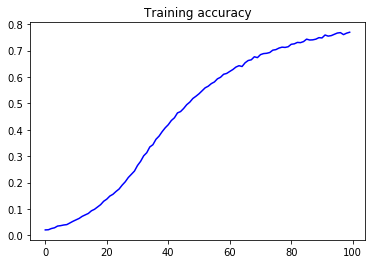

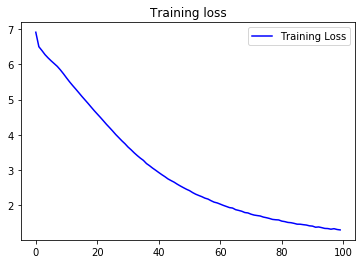

In [44]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [45]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope which you in brain forth state old pain rare away youth dyed so spent new old heart more kind still spent prove dead date dead loss so deeds so aside aside lie so days bright still aside live so kind old old 'no ' prove live now approve so bright days free tend grind kind on thee forsaken rage old worth forth behind their treasure days ' so bright aside free room gone on me old pride go a shame place appear appear new latch bide me quite date new gone on his way day dead day more mother spent


In [49]:
seed_text = "Somewhere over the rainbow"
next_words = 15
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Somewhere over the rainbow number thou too hour hour their chest lie torn dost new live new date of
